# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

Сделаем импорт всех необходимых библиотек для анализа и визуализации данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Загрузим данные и выведем первые пять строк датасета.

Создадим копию, которую будем использовать для подготовки данных к обучению. 

In [2]:
#Работа выполнялась в google colab
# from google.colab import files
# files.upload()

In [3]:
data = pd.read_csv('telecom_users.csv', index_col=0)
data.sort_index(inplace=True)
data_prepr = data.copy()
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Данные представлены в виде признаков разного типа - числовых и строковых

---
Выведем размер датафрейма и тип каждой колонки

In [7]:
print(data.shape)
data.info()

(5986, 21)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5986 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null

Видим, что в нашем наборе почти 6 тысяч строк и 21 признак, включая целевой. Сразу стоит отметить, что колонка TotalCharges имеет тип object, хотя должна иметь численный тип. Приведем ее к нужному типу позже.


---

Пропущенные значения:

In [8]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Пропущенных значений в датафрейме нет, по крайней мере все ячейки заполнены, в них нет Nan


---

Проверим на наличие продублированных записей



In [9]:
data.duplicated(['customerID']).sum()

0

ID абонента в датасете не повторяются. Все записи соответсвуют разным клиентам.

Выведем описание количественных признаков. Предварительно приведя TotalCharges к нужному типу

In [10]:
data['TotalCharges'] = data.TotalCharges.apply(pd.to_numeric, errors='coerce') # Не числовые значения меняем на NaN
data['TotalCharges'].fillna(value=(data.tenure * data.MonthlyCharges), inplace=True)  # Заполним NaN
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213,2294.221559
std,0.367909,24.516391,30.114702,2274.164124
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.650000,401.587500
50%,0.000000,29.000000,70.400000,1408.575000
75%,0.000000,56.000000,89.900000,3841.500000
max,1.000000,72.000000,118.750000,8684.800000


Можно заметить, что у признака TotalCharges заметно больше, чем медианное. Это может говорить о том, что распределение этой величины скошено вправо. 

Взглянем на распределение зависимой переменной

Churn = 26.51%


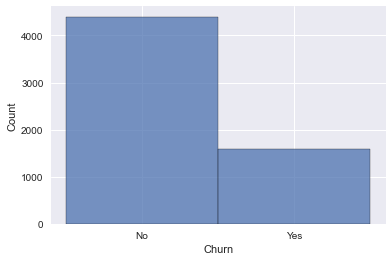

In [11]:
sns.histplot(data=data, x='Churn')
churn_percent = round((data['Churn'].value_counts()['Yes'] / data['Churn'].count()) * 100, 2)
print(f'Churn = {churn_percent}%')

26,5 процентов наблюдений в выборке ушли в отток. Распределение классов в датасете несбалансировано. Это нужно будет учитывать при прогнозировании.



Построим распределение времени пользования услугами у абонентов

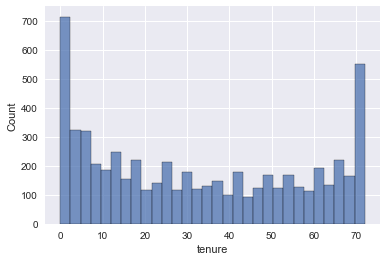

In [12]:
sns.histplot(data=data, x='tenure', bins=30)
plt.show()

Есть большое кол-во пользователей, которые пользовались услугами меньше полугода. Но также есть сегмент постоянных клиентов с сроком больше 6-ти лет.

Посмотрим распределение ежемесячного платежа и общей суммы.

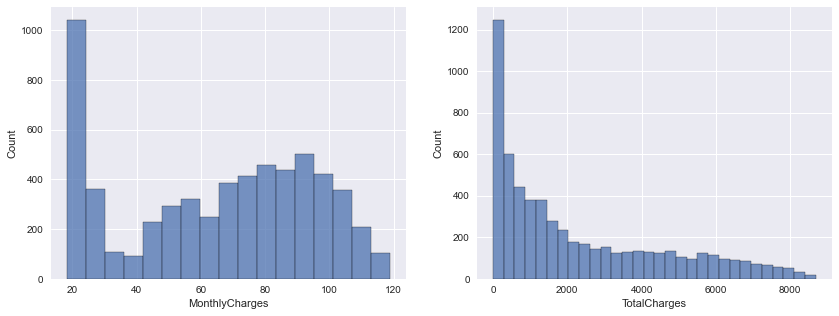

In [13]:
fig = plt.figure(figsize=(14,5))
ax_1 = fig.add_subplot(1,2,1)
ax_2 = fig.add_subplot(1,2,2)
sns.histplot(data=data, x='MonthlyCharges', ax=ax_1)
sns.histplot(data=data, x='TotalCharges', bins=30, ax=ax_2)
plt.show()

По сумме ежемесячного платежа можно выделить два кластера: большое количество абонентов маленьким с платежом (менее 30), и все остальные абоненты сумма платежа которых имеет распределение близкое к нормальному.


Далее, построим графики распределения всех остальных признаков.

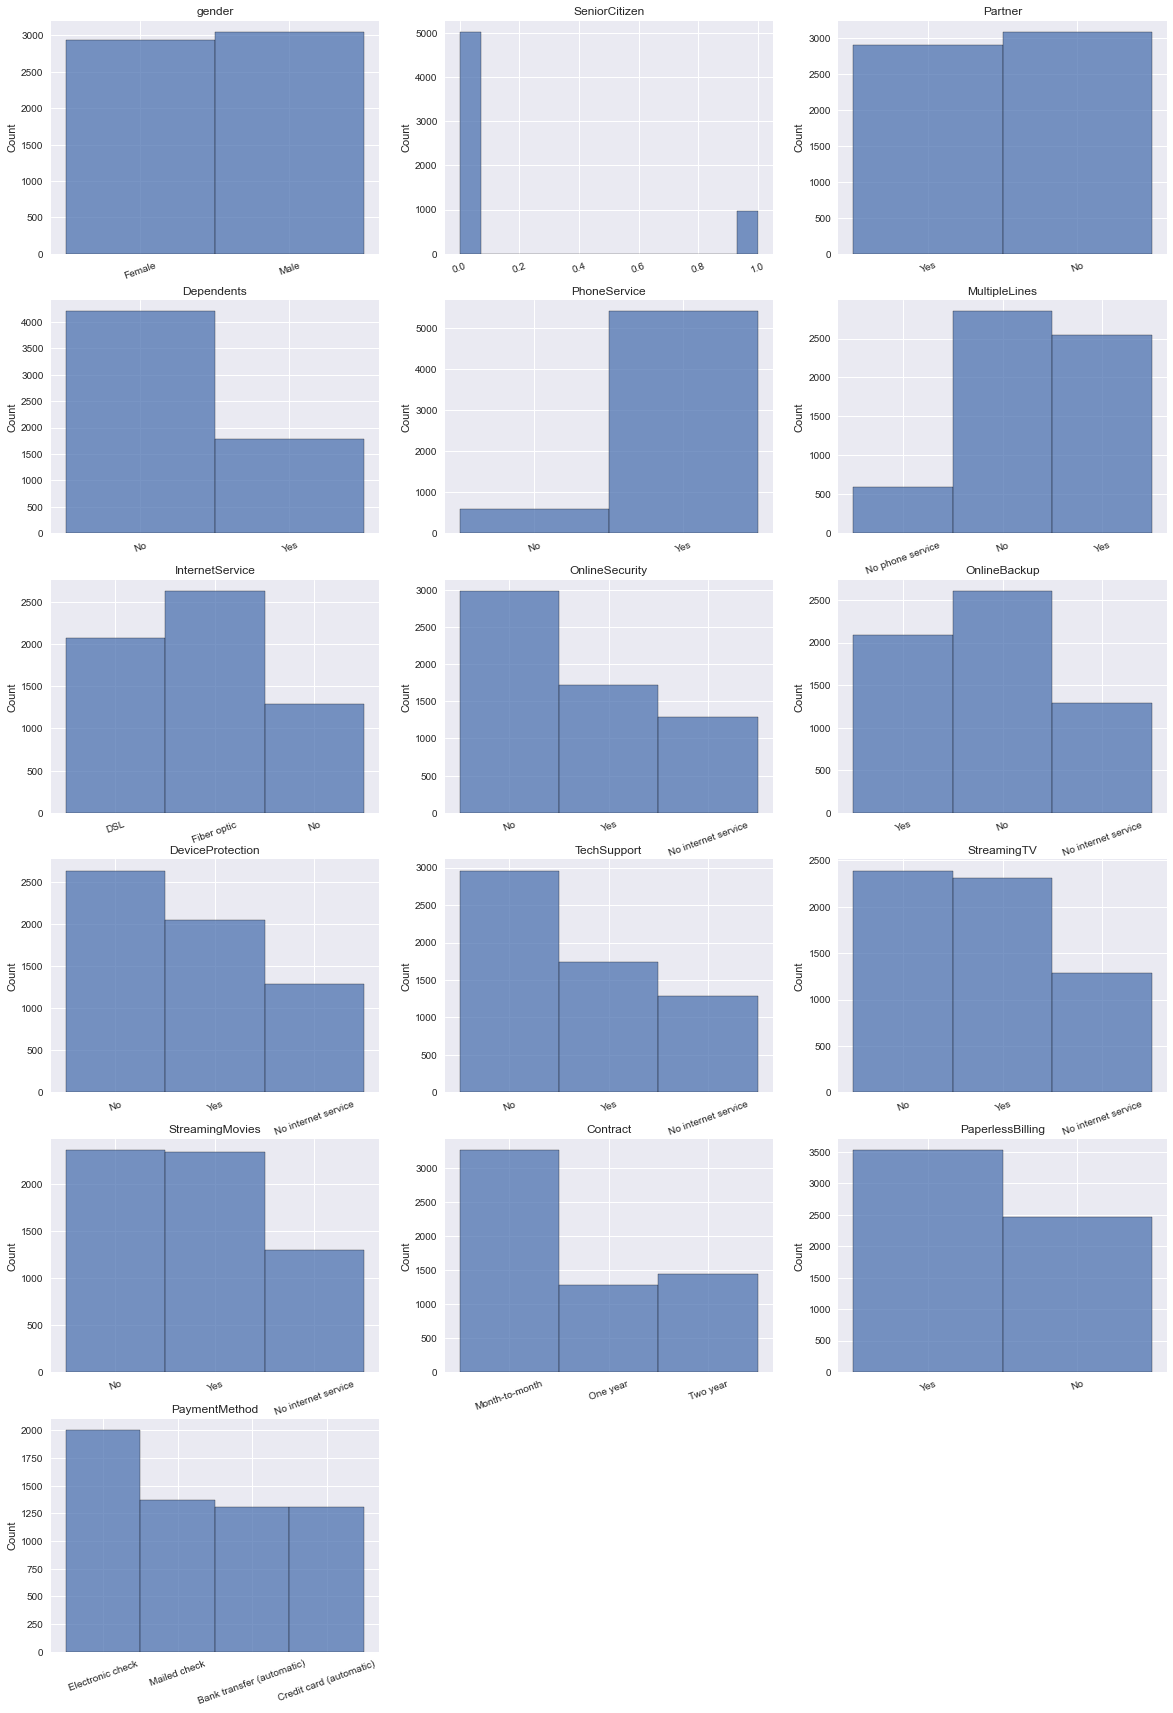

In [14]:
fig = plt.figure(figsize=(20, 30))
for n, col in enumerate(data.drop(['customerID', 'Churn', 'tenure'], axis=1).select_dtypes(exclude=float).columns):
 ax = fig.add_subplot(6, 3, n+1)
 sns.histplot(data, x=col, ax=ax)
 plt.xticks(rotation=20)
 ax.set_xlabel(None)
 ax.set_title(col)

Все эти признаки категориальные. Их можно условно разделить на две группы:
1. "Социальные" признаки, например пол или наличие супруга. В них можно отметить:

* Имеется явный дизбаланс классов в признаке "SeniorCitizen", но это логично. Очевидно, что в целом пенсионеров меньше, чем остальных людей
* Такая же ситуация с признаком "Dependents".

2. "Технические признаки", такие как наличие/отсутствие различных сервисов и услуг. По этим признакам:


*  Малое кол-во наблюдений не имеющих услуги телефонной связи. Признаки "PhoneService" и "MultipleLines". 
*  Большинство клиентов не заключают длительный контракт (на год или 2)
* Также сравнительно небольшое кол-во клиентов не имеют услуги Интернет.







# 2. Исследование зависимостей и формулирование гипотез

Попрубуем выяснить, какие пользователи перестают пользоваться услугами компании.

Удалим из датасета ID пользователя. Он нам не пригодится.

In [15]:
data.drop('customerID', axis=1, inplace=True)

Вероятно, что больше всего абонентов уходят на небольшом сроке пользования услугами: в течении полугода.

Посмотрим на каких месяцах пользователи уходили в отток

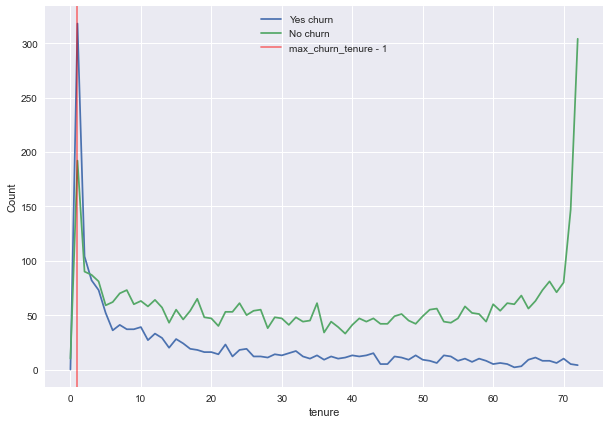

In [16]:
pivot = pd.pivot_table(data, values='gender', index='tenure', columns='Churn', aggfunc='count').fillna(0)
max_churn_tenure = pivot[pivot.Yes == pivot.Yes.max()].index
plt.figure(figsize=(10,7))
sns.lineplot(data=pivot, x=pivot.index, y=pivot.Yes, label='Yes churn')
sns.lineplot(data=pivot, x=pivot.index, y=pivot.No, label='No churn')
plt.axvline(x=max_churn_tenure, color='r', alpha=0.5, label=f'max_churn_tenure - {max_churn_tenure[0]}')
plt.ylabel('Count')
plt.legend()
plt.show()

По графику видно, что есть большое количество пользователей, которые ушли в отток после первого месяца пользования услугами. Таких записей в датасете более 300. Пользователи, которые являются клиентами более 70 месяцев, напротив, составляют лояльную группу практически без оттока.

Построим графики показывающие зависимость ежемесячной и общей суммы платежа от признака "Churn"

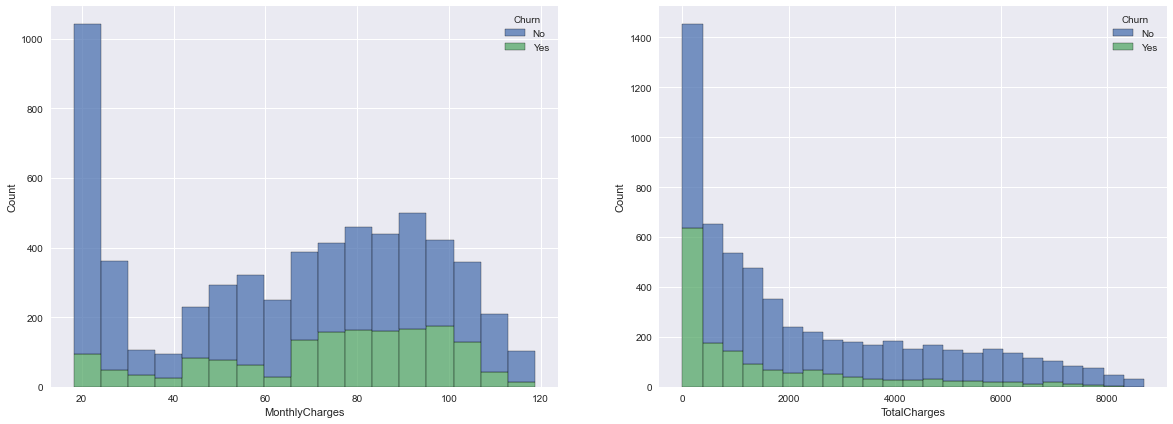

In [17]:
fig = plt.figure(figsize=(20,7))
ax_1 = fig.add_subplot(1, 2, 1)
ax_2 = fig.add_subplot(1, 2, 2)
sns.histplot(data=data, x='MonthlyCharges', hue='Churn', multiple="stack", ax=ax_1)
sns.histplot(data=data, x='TotalCharges', hue='Churn', multiple="stack", ax=ax_2)
plt.show()

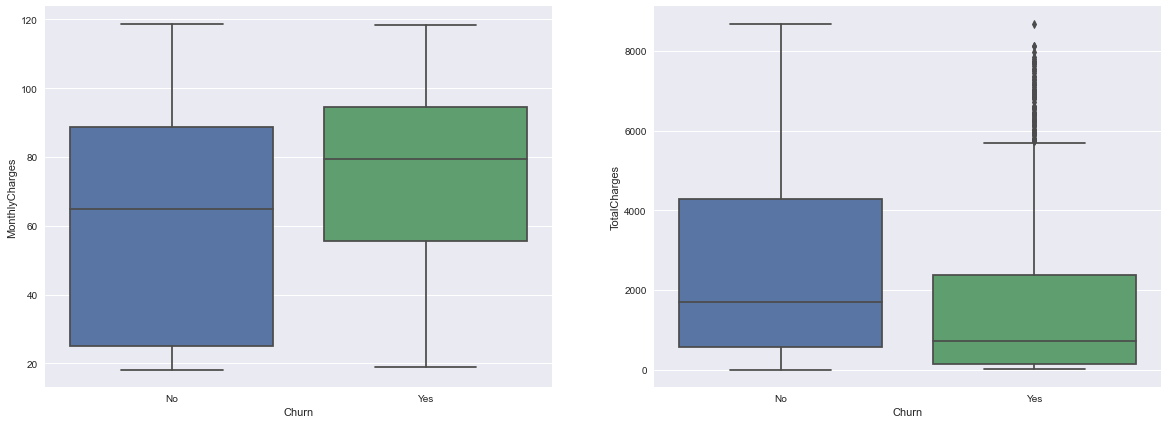

In [18]:
fig = plt.figure(figsize=(20,7))
ax_1 = fig.add_subplot(1, 2, 1)
ax_2 = fig.add_subplot(1, 2, 2)
sns.boxplot(data=data, y='MonthlyCharges', x='Churn', ax=ax_1)
sns.boxplot(data=data, y='TotalCharges', x='Churn', ax=ax_2)
plt.show()

Оба признака имеют разное распределение в зависимости от метки целевой переменной. Но, возможно, "TotalCharges" имеет большую корреляцию с "MonthlyCharges" и "tenure" т. к практически является их произведением. Посмотрим на их коэффициент корреляции. Также построим точечный график зависимости "TotalCharges" от произведения "MonthlyCharges" и "tenure".

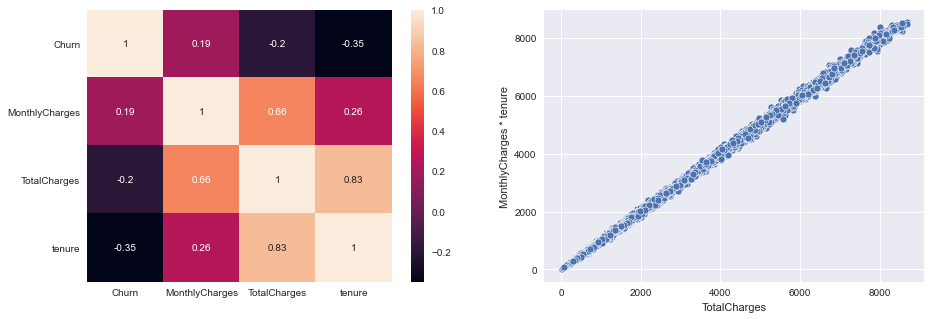

In [19]:
data['Churn'] = data['Churn'].map({'Yes':1, 'No':0})
cor = data[['Churn', 'MonthlyCharges', 'TotalCharges', 'tenure']].corr()
fig = plt.figure(figsize=(15, 5))
ax_1 = fig.add_subplot(1, 2, 1)
sns.heatmap(cor, annot=True, ax=ax_1)
ax_2 = fig.add_subplot(1, 2, 2)
y = data.MonthlyCharges * data.tenure
sns.scatterplot(data=data, x='TotalCharges', y=y, ax=ax_2)
ax_2.set_ylabel('MonthlyCharges * tenure')
plt.show()

TotalCharges имеет достаточно высокую корреляцию и с "tenure" и с "MonthlyCharges". И, как и ожидалось, очень высокую корреляцию с произведением эти признаков.

Построим графики отражающие зависимости категориальных признаков от целевой переменной.

Количество пользователей в зависимости от пола и ухода в отток:

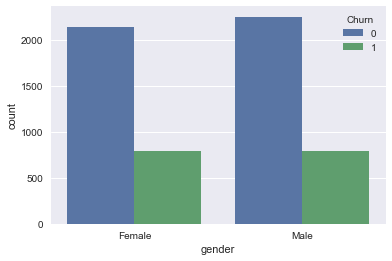

In [20]:
sns.countplot(data=data, x='gender', hue='Churn')
plt.show()

Нет зависимости вероятности оттока от пола абонента. (Было бы удивительно, если бы зависимость была)

---

Проверим есть ли зависимость оттока клиентов от метода оплаты:

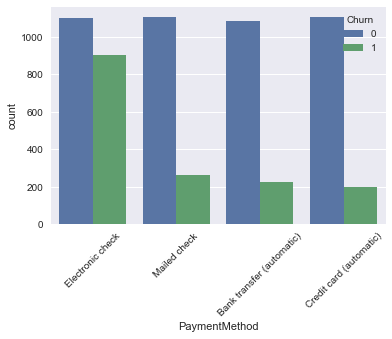

In [21]:
sns.countplot(data=data, x='PaymentMethod', hue='Churn')
plt.xticks(rotation=45)
plt.show()

Здесь уже интереснее: Пользователи, которые используют Electronic check, в несколько раз чаще уходят в отток, чем остальные.


---

Посмотрим на зависимость оттока от остальных категориальных переменных:

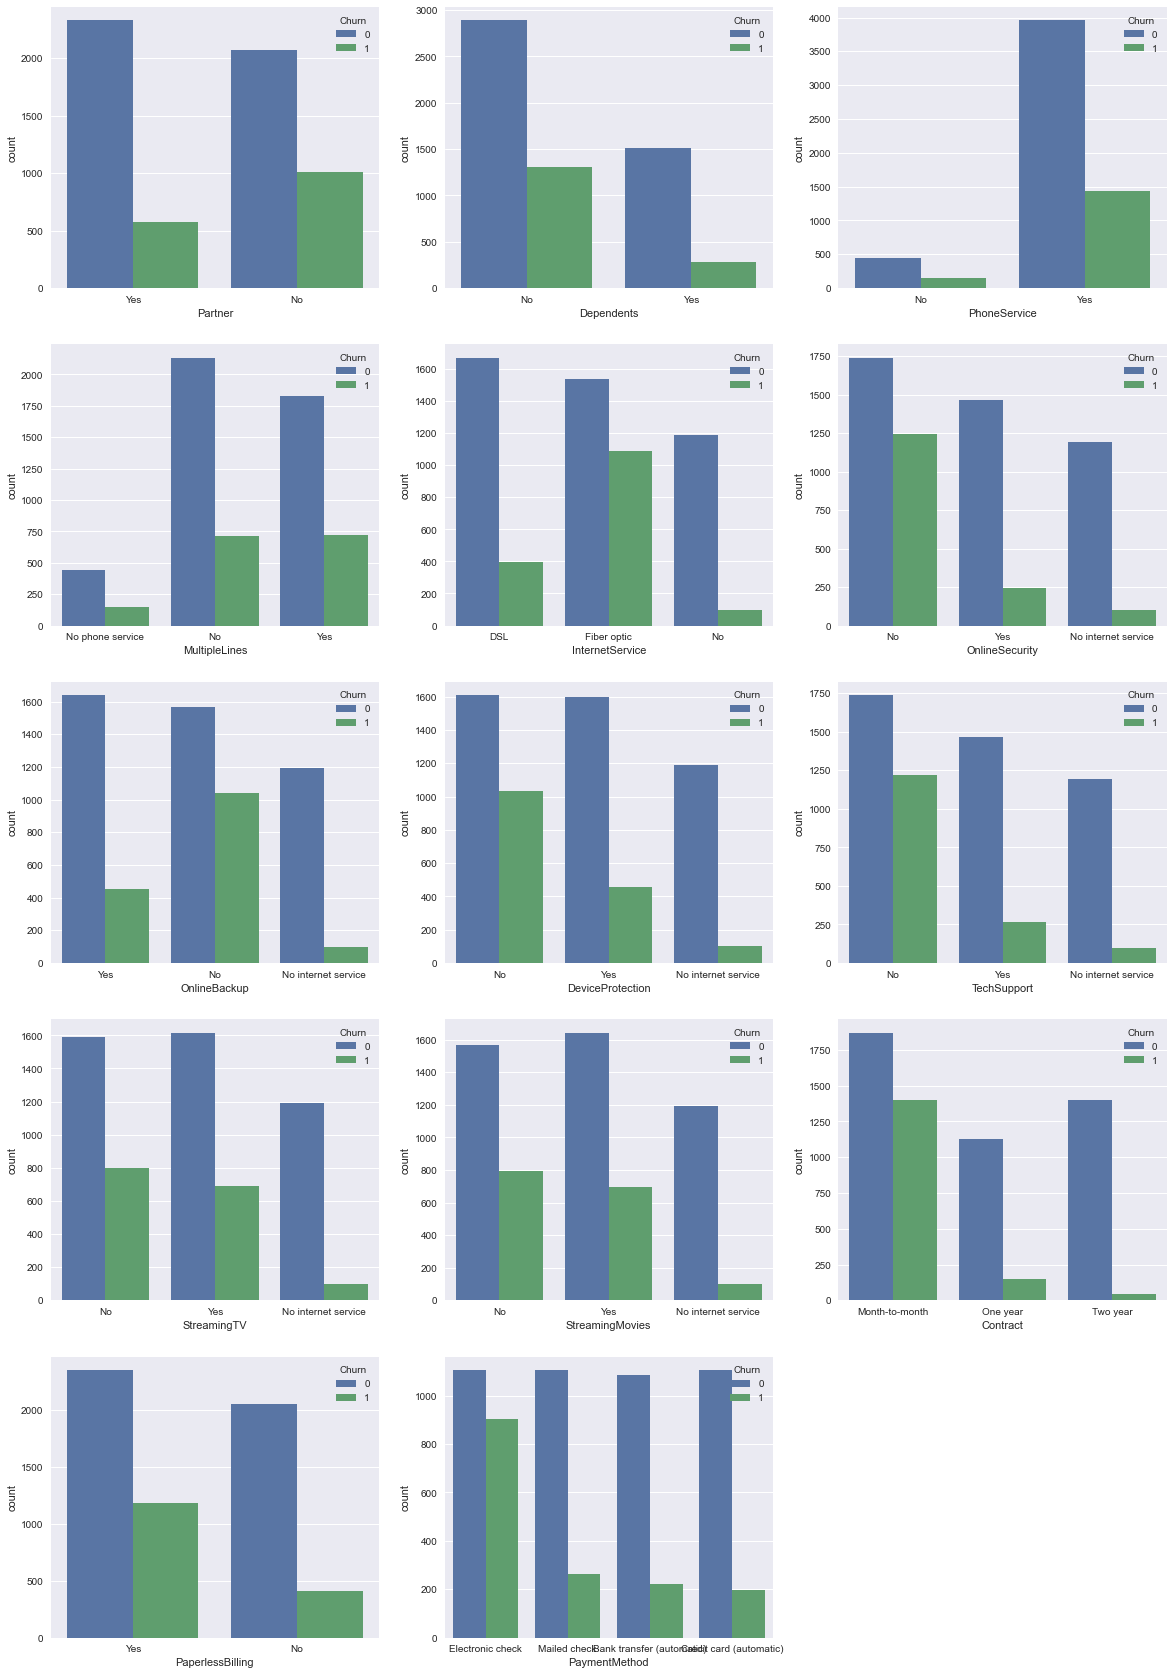

In [22]:
fig = plt.figure(figsize=(20,30))
for n, col in enumerate(data.drop('tenure', axis=1).columns[2:16]):
  ax = fig.add_subplot(5, 3, n+1)
  sns.countplot(data=data, x=col, hue='Churn', ax=ax)

Выводы, которые можно сделать по графикам:
- Наличие либо отсутсвие услуги телефонной связи не влияет на отток.
- Признаки 'StreamingMovies' дублирует признак "StreamingMovies" так как, вероятно, эти услуги подключаются парами.
- Можно увидеть, что пользователи имеющие тип подключения "Faber optic" гораздо больше остальных уходят в отток
- Клиенты, продляющие договор каждый месяц, уходят в отток намного чаще, чем остальные
- Заметно, что пользователи не имеющие услуги интернет, уходят в отток мало. 




Отдельно, стоит проверить действитьельно ли признак 'PhoneService' имеет низкую корреляцию с целевой переменной

In [23]:
from sklearn.preprocessing import LabelEncoder
lab_encod = LabelEncoder()
data['Churn'] = lab_encod.fit_transform(data['Churn'])
data['PhoneService'] = lab_encod.fit_transform(data['PhoneService'])
data['MultipleLines'] = lab_encod.fit_transform(data['MultipleLines'])
data.corr()['Churn'][['PhoneService', 'MultipleLines']]

PhoneService     0.009421
MultipleLines    0.034943
Name: Churn, dtype: float64

Признак "PhoneService" и зависящий от него признак "MultipleLines" имеют очень низкую корреляцию с целевой переменной

Как итог - отказываемся от этих данных:

- "gender" - не влияет на целевую переменную
- "TotalCharges" - несет избыточную информацию (высокая корреляция с "tenure" и "MonthlyCharges")
- "PhoneService", "MultipleLines" - не влияют на целевую переменную
- "StreamingMovies" - повторяет распределение других признаков

In [24]:
data.drop(['gender', 'PhoneService', 'TotalCharges', 'MultipleLines', 'StreamingMovies', 'TotalCharges'], axis=1, inplace=True)

Следующим шагом добавим несколько признаков и преобразуем имеющиеся:
- Добавление бинарного признака на основе "tenure", сделав его важнее. Новая фича будут определять принадленость абонента к кластеру "первый месяц использования"
- Добавление одного рангового признака, показывающего количество не подключенных услуг "Sum-no" с шагом 0.1.

In [25]:
data['first_month'] = np.where(data.tenure == 1, 1, 0)

data['Sum_no'] = data.drop(['Partner', 'Dependents', 'Churn'], axis=1).eq('No').sum(axis=1)/10 


При подготовке данных к обучению, использовал несколько функций:
- Для кодировки номинативных переменных с двумя градациями использовал LabelEncoder
- Для кодировки номинативных переменных с тремя и более градациями использовал целевое кодирование реализованное функцией TargetEncoder из библиотеки category_encoders
- Для преобразования количественных признаков использовал MinMaxScaler

In [4]:
# !pip install category_encoders # Необходимо для colab
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from category_encoders import TargetEncoder
lab_encoder = LabelEncoder()
min_max = MinMaxScaler()
target_encoder = TargetEncoder()

In [27]:
# Признаки у которых 2 градации
col = data.nunique() == 2
col = data[col[col].index].select_dtypes(include='object').columns
for column in col:
  data[column] = lab_encoder.fit_transform(data[column])
# Признаки у которых больше двух градаций
col = data.nunique() > 2
col = data[col[col].index].select_dtypes(include='object').columns
data[col] = target_encoder.fit(data[col], data['Churn'])
data[col] = target_encoder.transform(data[col], data['Churn'])
# Стандартизируем количественные признаки. Логарифмирование MonthlyCharges немного улучшило итоговый скор 
data['MonthlyCharges'] = np.log(data.MonthlyCharges)
data[['MonthlyCharges', 'tenure']] = min_max.fit_transform(data[['MonthlyCharges', 'tenure']])

Все признаки числовые и сведены к диапазону от -1 до 1.

In [28]:
data.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,first_month,Sum_no
0,0,1,0,0.013889,0.265119,0.265119,0.265119,0.265119,0.265119,0.265119,0.265119,1,0.265119,0.262711,0,1,0.4
1,0,0,0,0.472222,0.265119,0.265119,0.265119,0.265119,0.265119,0.265119,0.265119,0,0.265119,0.607633,0,0,0.4
2,0,0,0,0.027778,0.265119,0.265119,0.265119,0.265119,0.265119,0.265119,0.265119,1,0.265119,0.577747,1,0,0.3
3,0,0,0,0.625000,0.265119,0.265119,0.265119,0.265119,0.265119,0.265119,0.265119,0,0.265119,0.448845,0,0,0.3
4,0,0,0,0.027778,0.265119,0.265119,0.265119,0.265119,0.265119,0.265119,0.265119,1,0.265119,0.723110,1,0,0.5


Посмотрим на коэффициенты корреляции признаков с целевой переменной. 

In [29]:
corr_col = data.corr()['Churn'].sort_values(ascending=False)
corr_col.drop('Churn')

Sum_no              3.158156e-01
first_month         2.478025e-01
MonthlyCharges      2.036644e-01
PaperlessBilling    1.889963e-01
SeniorCitizen       1.500972e-01
Contract            8.905908e-17
StreamingTV         8.905908e-17
PaymentMethod       8.905908e-17
DeviceProtection    8.905908e-17
OnlineBackup        8.905908e-17
OnlineSecurity      8.905908e-17
InternetService     8.905908e-17
TechSupport         8.905908e-17
Partner            -1.468400e-01
Dependents         -1.602038e-01
tenure             -3.484686e-01
Name: Churn, dtype: float64

# 3. Построение моделей для прогнозирования оттока

Импортируем необходимые библиотеки и модели

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Подготовим данные для обучения моделей. 

Для обучения используем копию данных, которая была сделана в самом начале.

Разделим датасет на тренировочную и тестовую части, чтобы при преобразовании данных трейн-сет не содержал информацию о тестовой выборке.

В разделении на train test учтем распределение целевой переменной.

И удалим неиспользуемые признаки.

In [6]:
data_prepr.drop(['customerID', 'gender', 'PhoneService', 'TotalCharges', 
                 'MultipleLines', 'StreamingMovies'], axis=1, inplace=True)

In [7]:
X = data_prepr.drop(['Churn'], axis=1)
y = LabelEncoder().fit_transform(data_prepr['Churn'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.1, stratify=y)
skf = StratifiedKFold(random_state=1, shuffle=True)
X_train.shape, X_test.shape

((5387, 14), (599, 14))

Для препроцессинга и обучения моделей использовал Pipeline.

Сначала, нужно определить колонки к которым будут примены преобразования. Затем собрать ColumnTransformer, который будет преобразовывать датасет в пригодный для обучения.

In [8]:
col = X.nunique() == 2
two_var_col = X[col[col].index].select_dtypes(include='object').columns
two_var_col

Index(['Partner', 'Dependents', 'PaperlessBilling'], dtype='object')

In [9]:
col = X.nunique() > 2
more_var_col = X[col[col].index].select_dtypes(include='object').columns
more_var_col

Index(['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'Contract', 'PaymentMethod'],
      dtype='object')

In [10]:
def f(x):
  v = np.where(x == 1, 1, 0)
  return(v)

def f1(X):
  n = X.drop(['Partner', 'Dependents'], axis=1).eq('No').sum(axis=1)/10
  return n.to_frame()


ct = ColumnTransformer([('sum_no', FunctionTransformer(f1), X.columns),
                        ('append', FunctionTransformer(f), ['tenure']),
                        ('log', FunctionTransformer(np.log), ['MonthlyCharges']),
                        ('num', MinMaxScaler(), ['MonthlyCharges', 'tenure']),
                        ('two_var_col', OneHotEncoder(drop='first'), ['Partner', 'Dependents', 'PaperlessBilling']),
                        ('more_var_col', TargetEncoder(), more_var_col)])

Последовательно обучим несколько моделей.

В данной задаче классификации нужно предсказать уйдет клиент или нет на данном этапе работы с ним. Вероятно не пропустить клиента который собрался уходить кажется более важным, чем выделить лояльных, так как привлечение новых клиентов обходиться дороже, чем удержание старых. Соответственно, из пары precision-recall более важным будет максимизировать recall.

Но recall, хоть эта метрика и является более важной, нельзя оценивать отдельно от precision. Поэтому для выбора моделей с наилучшими результатами будет использоваться roc-auc. 

In [64]:
# Оформил метрики в небольшой датафрейм 
# и создал список предсказаний для отрисовки roc_curve 
scores = pd.DataFrame(index=['precision', 'recall', 'roc_auc'])
probes = []
def score(y_pred_proba, name, y_test=y_test):
  y_pred = np.where(y_pred_proba>0.5, 1, 0)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred_proba)
  scores[name] = [precision, recall, roc_auc]
  probes.append(y_pred_proba)


При обучении моделей было использовано по несколько подборов с помощью GridSearch.
В основном, сначала я перебирал варианты препроцессинга. Их было взято немного: *MinMaxScaler()* или *StandardScaler()* для числовых переменных; и попытка прологарифмировать признак MonthlyCharges (в некоторых случаях это дало небольшой прирост метрики)

Далее был подбор параметров модели. В большинстве из них подбор происходил в несколько итераций. 

### Наивный байесовский классификатор

In [65]:
gnb = GaussianNB()
gnb_pipe = Pipeline(steps=[("ct", ct), ("gnb", gnb)])
gnb_params = {'ct__num': [MinMaxScaler()],
              'ct__log': ['passthrough']}
gs_gnb = GridSearchCV(gnb_pipe, gnb_params, scoring='roc_auc', cv=skf, n_jobs=2)
gs_gnb.fit(X_train, y_train)
gs_gnb.best_params_

{'ct__log': 'passthrough', 'ct__num': MinMaxScaler()}

In [66]:
y_pred_proba_gnb = gs_gnb.predict_proba(X_test)[:,1]
score(y_pred_proba_gnb, 'GaussianNB')

### Логистическая регрессия

In [67]:
lr = LogisticRegression(random_state=1)
lr_pipe = Pipeline(steps=[("ct", ct), ("lr", lr)])
lr_params = {'ct__num': [StandardScaler()],
             'ct__log': [FunctionTransformer(np.log)],
             'lr__C': [1, 0.1, 0.01],
             'lr__penalty': ['l2'],
             'lr__solver': ['lbfgs'],
             'lr__class_weight': ['balansed', None]}
gs_lr = GridSearchCV(lr_pipe, lr_params, scoring='roc_auc', cv=skf, n_jobs=2)            
gs_lr.fit(X_train, y_train)
gs_lr.best_params_

{'ct__log': FunctionTransformer(func=<ufunc 'log'>),
 'ct__num': StandardScaler(),
 'lr__C': 1,
 'lr__class_weight': 'balansed',
 'lr__penalty': 'l2',
 'lr__solver': 'lbfgs'}

In [68]:
y_pred_proba_lr = gs_lr.predict_proba(X_test)[:,1]
score(y_pred_proba_lr, 'LogisticRegression')

### Дерево решений

In [69]:
dtc = DecisionTreeClassifier(random_state=1)
dtc_pipe = Pipeline(steps=[("ct", ct), ("dtc", dtc)])
dtc_params = {'dtc__max_depth': range(5, 8),
              'dtc__min_samples_split': range(2, 4),
              'dtc__min_samples_leaf': range(80, 90, 2),
              'ct__num': [StandardScaler()],
              'ct__log': ['passthrough']}
gs_dtc = GridSearchCV(dtc_pipe, dtc_params, cv=skf, n_jobs=2, scoring='roc_auc', verbose=1) 

gs_dtc.fit(X_train, y_train)
gs_dtc.best_params_

# Несколько последовательных переборов параметров привели к такому набору

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'ct__log': 'passthrough',
 'ct__num': StandardScaler(),
 'dtc__max_depth': 7,
 'dtc__min_samples_leaf': 80,
 'dtc__min_samples_split': 2}

In [70]:
y_pred_proba_dtc = gs_dtc.predict_proba(X_test)[:,1]
score(y_pred_proba_dtc, 'DecisionTree')

### k ближайших соседей

In [71]:
knn = KNeighborsClassifier()
knn_pipe = Pipeline(steps=[("ct", ct), ("knn", knn)])
params_knn = {'knn__n_neighbors':range(35,45),
              'knn__leaf_size':range(2,4),
              'ct__num': [MinMaxScaler()],
             'ct__log': [FunctionTransformer(np.log)]}
gs_knn = GridSearchCV(knn_pipe, params_knn, cv=skf, n_jobs=2, scoring='roc_auc', verbose=1)

gs_knn.fit(X_train, y_train)
gs_knn.best_params_

# Параметры KNeighborsClassifier

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'ct__log': FunctionTransformer(func=<ufunc 'log'>),
 'ct__num': MinMaxScaler(),
 'knn__leaf_size': 2,
 'knn__n_neighbors': 39}

In [72]:
y_pred_proba_knn = gs_knn.predict_proba(X_test)[:,1]
score(y_pred_proba_knn, 'KNeighbors')

### Метод опорных векторов

In [73]:
svc = SVC(probability=True, random_state=1)
svc_pipe = Pipeline(steps=[("ct", ct), ("svc", svc)])
svc_params = {'svc__kernel': ['linear'],
              'svc__C': [10],
              'ct__num': [MinMaxScaler()],
             'ct__log': [FunctionTransformer(np.log)]}
gs_svc = GridSearchCV(svc_pipe, svc_params, cv=skf, n_jobs=2, scoring='roc_auc', verbose=1)

gs_svc.fit(X_train, y_train)
gs_svc.best_params_


Fitting 5 folds for each of 1 candidates, totalling 5 fits


{'ct__log': FunctionTransformer(func=<ufunc 'log'>),
 'ct__num': MinMaxScaler(),
 'svc__C': 10,
 'svc__kernel': 'linear'}

In [74]:
y_pred_proba_svc = gs_svc.predict_proba(X_test)[:,1]
score(y_pred_proba_svc, 'SVC')

### Случайный лес

In [75]:
rfc = RandomForestClassifier(random_state=1)
rfc_pipe = Pipeline(steps=[("ct", ct), ("rfc", rfc)])
params_rfc = {'rfc__n_estimators':range(150, 200, 10),
              'rfc__max_depth':range(7, 15),
              'rfc__min_samples_split':range(2, 10),
              'rfc__min_samples_leaf': range(5, 20),
              'ct__num': [StandardScaler()],
              'ct__log': ['passthrough']}
gs_rfc = RandomizedSearchCV(rfc_pipe, params_rfc, cv=skf, n_jobs=2, verbose=2, scoring='roc_auc', random_state=1)

gs_rfc.fit(X_train, y_train)
gs_rfc.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'rfc__n_estimators': 150,
 'rfc__min_samples_split': 7,
 'rfc__min_samples_leaf': 12,
 'rfc__max_depth': 8,
 'ct__num': StandardScaler(),
 'ct__log': 'passthrough'}

In [76]:
y_pred_proba_rfc = gs_rfc.predict_proba(X_test)[:,1]
score(y_pred_proba_rfc, 'RandomForest')


### Бустинг

In [77]:
abc = AdaBoostClassifier(random_state=1, )
abc_pipe = Pipeline(steps=[("ct", ct), ("abc", abc)])
params_abc = {'abc__n_estimators':range(30, 51, 10),
              'abc__learning_rate': [1, 0.5, 0.4, 0.3],
              'abc__base_estimator': [DecisionTreeClassifier(max_depth=1),
                                     DecisionTreeClassifier(max_depth=2)],
              'ct__num': [MinMaxScaler()],
              'ct__log': [FunctionTransformer(np.log)]}
gs_abc = GridSearchCV(abc_pipe, params_abc, cv=skf, n_jobs=2, scoring='roc_auc')
gs_abc.fit(X_train, y_train)
gs_abc.best_params_

{'abc__base_estimator': DecisionTreeClassifier(max_depth=1),
 'abc__learning_rate': 0.4,
 'abc__n_estimators': 40,
 'ct__log': FunctionTransformer(func=<ufunc 'log'>),
 'ct__num': MinMaxScaler()}

In [78]:
y_pred_proba_abc = gs_abc.predict_proba(X_test)[:,1]
score(y_pred_proba_abc, 'AdaBoost')

In [79]:
gbc = GradientBoostingClassifier(max_depth=2, random_state=1, max_features='auto')
gbc_pipe = Pipeline(steps=[("ct", ct), ("gbc", gbc)])
params_gbc = {'gbc__max_depth':range(2, 4),
              'gbc__learning_rate': [0.05, 0.1],
              'gbc__n_estimators': [150],
              'gbc__min_samples_leaf': [3, 5]}
gs_gbc = GridSearchCV(gbc_pipe, params_gbc, cv=skf, n_jobs=2, verbose=2, scoring='roc_auc')
gs_gbc.fit(X_train, y_train)
gs_gbc.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


{'gbc__learning_rate': 0.05,
 'gbc__max_depth': 2,
 'gbc__min_samples_leaf': 5,
 'gbc__n_estimators': 150}

In [80]:
y_pred_proba_gbc = gs_gbc.predict_proba(X_test)[:,1]
score(y_pred_proba_gbc, 'GradBoost')

In [81]:
scores.T.sort_values('roc_auc', ascending=False)

,precision,recall,roc_auc
AdaBoost,0.695652,0.503145,0.873235
GradBoost,0.666667,0.477987,0.872992
LogisticRegression,0.669492,0.496855,0.865216
SVC,0.709091,0.490566,0.865116
RandomForest,0.688679,0.459119,0.862157
KNeighbors,0.669492,0.496855,0.847077
DecisionTree,0.663717,0.471698,0.845798
GaussianNB,0.522822,0.792453,0.829181


Самый высокий roc-auc у градиентного бустинга, логистической регрессии, и адаптивного бустинга.

График roc-кривых для каждой модели

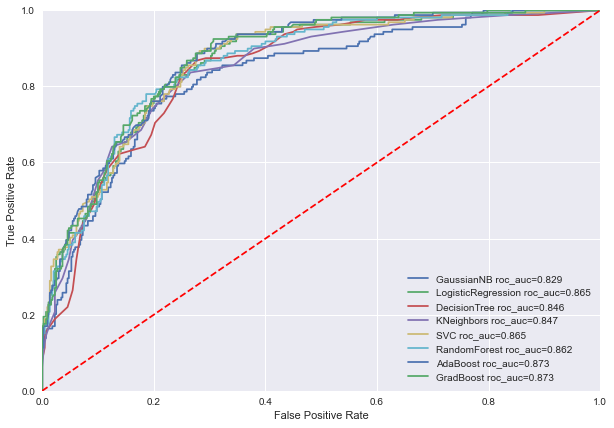

In [82]:
plt.figure(figsize=(10,7))
for n, y_pred in enumerate(probes):
  model_name = scores.columns[n]
  fpr, tpr, _ = roc_curve(y_test, y_pred)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, label = f'{model_name} roc_auc={round(roc_auc, 3)}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 4. Сравнение качества моделей 

В этом разделе попробую отрегулировать recall у трех лучших моделей изменив уверенность модели.

Для этого нужно определиться какой уровень precision можно считать приемлемым.

Используем precision_recall_curve

In [83]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

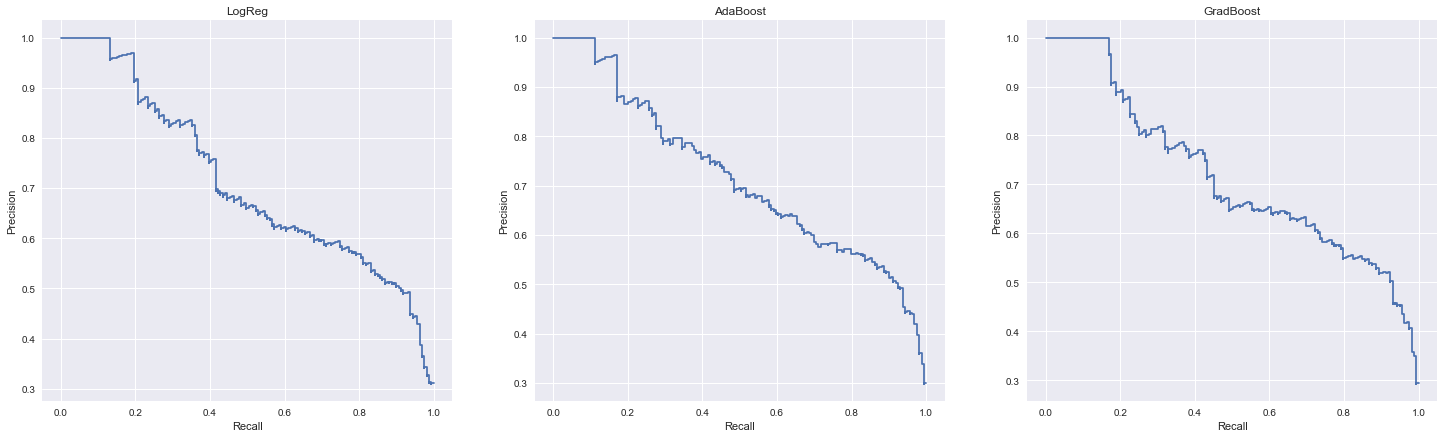

In [84]:
fig, (ax_1, ax_2 ,ax_3) = plt.subplots(1, 3, figsize=(25,7))

y_pred = gs_lr.predict_proba(X_test)[:,1]
prec, recall, _ = precision_recall_curve(y_test, y_pred)
PrecisionRecallDisplay(prec, recall).plot(ax=ax_1)
ax_1.set_title('LogReg')

y_pred = gs_abc.predict_proba(X_test)[:,1]
prec, recall, _ = precision_recall_curve(y_test, y_pred)
PrecisionRecallDisplay(prec, recall).plot(ax=ax_2)
ax_2.set_title('AdaBoost')

y_pred = gs_gbc.predict_proba(X_test)[:,1]
prec, recall, _ = precision_recall_curve(y_test, y_pred)
PrecisionRecallDisplay(prec, recall).plot(ax=ax_3)
ax_3.set_title('GradBoost')

plt.show()

В общем, соотношение precision-recall стоит выбирать исходя из задачи. В нашем случае, я решил сравнить recall, для precision примерно равному 0.5

In [85]:
prec, recall, tresholds = precision_recall_curve(y_test, gs_lr.predict_proba(X_test)[:,1])
lr_tr = np.min(tresholds[np.where((prec > 0.5) & (prec < 0.55))])
y_pred = np.where(gs_lr.predict_proba(X_test)[:,1] > lr_tr, 1, 0)
print(f'precision = {round(precision_score(y_test, y_pred), 3)}')
print(f'recall = {round(recall_score(y_test, y_pred), 3)}')
print(f'treshold = {round(lr_tr, 3)}')

precision = 0.5
recall = 0.906
treshold = 0.161


In [86]:
prec, recall, tresholds = precision_recall_curve(y_test, gs_abc.predict_proba(X_test)[:,1])
abc_tr = np.min(tresholds[np.where((prec > 0.5) & (prec < 0.55))])
y_pred = np.where(gs_abc.predict_proba(X_test)[:,1] > abc_tr, 1, 0)
print(f'precision = {round(precision_score(y_test, y_pred), 3)}')
print(f'recall = {round(recall_score(y_test, y_pred), 3)}')
print(f'treshold = {round(abc_tr, 3)}')

precision = 0.503
recall = 0.918
treshold = 0.477


In [87]:
prec, recall, tresholds = precision_recall_curve(y_test, gs_gbc.predict_proba(X_test)[:,1])
gbc_tr = np.min(tresholds[np.where((prec > 0.5) & (prec < 0.55))])
y_pred = np.where(gs_gbc.predict_proba(X_test)[:,1] > gbc_tr, 1, 0)
print(f'precision = {round(precision_score(y_test, y_pred),3)}')
print(f'recall = {round(recall_score(y_test, y_pred),3)}')
print(f'treshold = {round(gbc_tr, 3)}')

precision = 0.5
recall = 0.925
treshold = 0.165


Максимальное значение у модели GradientBoosting = 0.925

Cохранение моделей

In [88]:
import joblib

In [89]:
with open('lr.pkl', 'w'):
    joblib.dump(gs_lr.best_estimator_, 'lr.pkl', compress = 1)

In [90]:
with open('abc.pkl', 'w'):
    joblib.dump(gs_abc.best_estimator_, 'abc.pkl', compress = 1)

In [91]:
with open('gbc.pkl', 'w'):
    joblib.dump(gs_gbc.best_estimator_, 'gbc.pkl', compress = 1)

In [162]:
# files.download('lr.pkl') 
# files.download('abc.pkl')
# files.download('gbc.pkl')

In [6]:
import sklearn
sklearn. __version__

'1.0.1'

Для проверки полученных моделей можно использовать ячейку ниже:
- Нужно указать путь к файлу с датасетом, и к файлам с моделями
- В работе моделей используется сторонняя библиотека category_encoders
- При создании моделей использовалась версия sklearn 1.0.1

В результате в выводе ячейки будет выведено значение roc-auc для каждой модели.

In [8]:
 #путь к файлу
file_name = 'telecom_users.csv'
# путь к сохраненным моделям
lr_path = 'lr.pkl'
abc_path = 'abc.pkl'
gbc_path = 'gbc.pkl'


import pandas as pd
import numpy as np
import joblib
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from category_encoders import TargetEncoder 
lab_encoder = LabelEncoder()
standard_scaler = StandardScaler()
min_max = MinMaxScaler()


data = pd.read_csv(file_name, index_col=0)
data = data.head(300)

data.drop(['customerID', 'gender', 'PhoneService', 'TotalCharges', 
                 'MultipleLines', 'StreamingMovies'], axis=1, inplace=True)
X = data.drop(['Churn'], axis=1)
y = LabelEncoder().fit_transform(data['Churn'])


def f(x):
  v = np.where(x == 1, 1, 0)
  return(v)
def f1(X):
  n = X.drop(['Partner', 'Dependents'], axis=1).eq('No').sum(axis=1)
  return n.to_frame()


lr = joblib.load(lr_path)
y_pred_proba_lr = lr.predict_proba(X)[:,1]
print(f'LogReg, roc_auc = {roc_auc_score(y, y_pred_proba_lr)}')

abc = joblib.load(abc_path)
y_pred_proba_adc = abc.predict_proba(X)[:,1]
print(f'AdaBoost, roc_auc = {roc_auc_score(y, y_pred_proba_adc)}')

gbc = joblib.load(gbc_path)
y_pred_proba_gbc = gbc.predict_proba(X)[:,1]
print(f'GradBoost, roc_auc = {roc_auc_score(y, y_pred_proba_gbc)}')

#Проверка на работоспособность с набором из 300 строк исходного датасета

LogReg, roc_auc = 0.8573295454545454
AdaBoost, roc_auc = 0.8696022727272728
GradBoost, roc_auc = 0.8755681818181819
